In [15]:
# Logistic Regression

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn import set_config
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    roc_auc_score, log_loss, confusion_matrix, classification_report, roc_curve,
    mean_absolute_error, mean_squared_error, r2_score
)


df = pd.read_csv(r'C:\Users\viksaraw\OneDrive\Berkeley\Capstone-1\May\Data\AfterEDA.csv')
df.head(5)
#df.shape

,date_sold,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [17]:
# Convert date sold to just year_sold
df['year_sold'] = pd.to_datetime(df['date_sold']).dt.year.astype(int)
df = df.drop(columns=['date_sold'], axis =1)

In [18]:
# Create binary target variable (price above median)
median_price = df['price'].median()
df['price_above_median'] = (df['price'] > median_price).astype(int)

# Define features and target
X = df.drop(columns=['price', 'price_above_median'])
y = df['price_above_median']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Train logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict and evaluate

y_train_pred = model.predict(X_test_scaled)
y_test_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy of the logistic regression model: {accuracy:.2f}")


Accuracy of the logistic regression model: 0.85


Explained Variance Ratio by PCA component:
Component 1: 27.52%
Component 2: 11.59%
Component 3: 9.71%
Component 4: 7.19%
Component 5: 6.35%
Component 6: 5.36%
Component 7: 5.25%
Component 8: 4.56%
Component 9: 4.37%
Component 10: 3.46%

 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      2136
           1       0.87      0.84      0.85      2187

    accuracy                           0.85      4323
   macro avg       0.85      0.85      0.85      4323
weighted avg       0.85      0.85      0.85      4323


 Confusion Matrix:


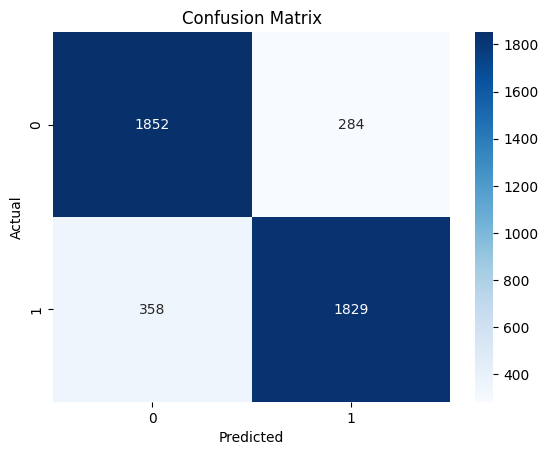

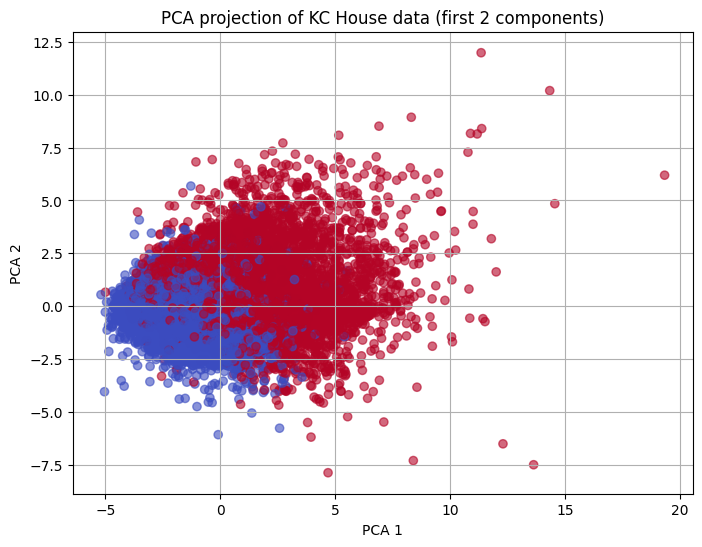

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA with 10 components
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)


# Explained variance
explained_var = pca.explained_variance_ratio_
print("Explained Variance Ratio by PCA component:")
for i, ev in enumerate(explained_var):
    print(f"Component {i+1}: {ev:.2%}")

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


print("\n Classification Report:")
print(classification_report(y_test, y_test_pred))

print("\n Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# PCA Visualization of first 2 components
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.title("PCA projection of KC House data (first 2 components)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()
